# <center> Lecture9 : Simple Normal Regression </center>  
 
## <center> Instructor: Dr. Hu Chuan-Peng </center> 

## Intro: 线性模型  

> ⭐从lec9开始，我们将重点介绍贝叶斯模型和统计分析方法的结合  


在lec9中，我们关注一个简单的线性模型，探究压力(stress)和自我控制(self control)之间的关系  

> * 🤦‍♀️🤦‍♀️当你压力大时，或许也曾：疯狂购物、沉迷游戏；但有的时候，当你感觉到压力大时，或许也曾：卸载软件，聚精会神  
> * 从直觉上我们能感受到似乎压力与自我控制之间存在某种联系  

我们使用的数据来自Human Penguin Project (Hu et al., 2018, doi: 10.17605/OSF.IO/H52D3)，该项目使用了多种常见的心理测量量表，并在跨国人群中进行施测，其中包含了测量压力与自我控制的量表。  

- 测量压力的量表共有14道题，每道题的标尺有5个水平，分值为1-5，总分的分布范围为14-70  

- 测量自我控制的量表共有13道题，每道题的标尺有5个水平，分值为1-5，总分的分布范围为13-65  

> * 数据来源: Hu, C.-P. et al. (2018). Raw data from the Human Penguin Project. Open Science Framework. https://doi.org/10.17605/OSF.IO/H52D3  
> * 压力量表来源：Cohen, S., Kamarck, T. & Mermelstein, R. A global measure of perceived stress. J. Health. Soc. Behav. 24, 385–396 (1983).  
> * 自我控制量表来源：Tangney, J. P., Baumeister, R. F. & Boone, A. L. High self-control predicts good adjustment, less pathology, better grades, and interpersonal success. J. Pers. 72, 271–324 (2004).

**使用线性模型表示二者关系**  

* 在这个例子中，我们将每个被试的自我控制水平设为$Y$，压力水平设为$X$。在收集完n个被试的数据后，我们可以得到：  

$$  
\left\lbrace (Y_1,X_1), (Y_2,X_2),...,(Y_n,X_n) \right\rbrace  
$$  

* 我们可以使用线性模型来描述$Y$与$X$的关系，常见地，我们会将二者的关系写为：  

$$  
Y_i = \beta_0 + \beta_1 X_i + \epsilon \;\;\;\;\;\;\;\;\epsilon \sim N(0,\sigma^2)\\  
$$  

*($\beta_0$为截距，$\beta_1$为斜率，$\epsilon$为残差)*  

# Normal linear regression  

> ⭐我们也可以换一种方式来表达线性模型  

*  <span style = "color: orange;">预测值</span> $\mu_i$(即直线上橙色的点)可以写为：$\mu_i = \beta_0 + \beta_1 X_i(1)$  

* 从图上可以看到<span style = "color: orange;">预测值</span>和<span style = "color: gray;">实际值</span> (即灰色的散点)之间存在出入，实际值会在预测值附近波动  

* 那么实际值可以看作服从以$\mu_i$为均值，标准差为$\sigma$的正态分布，即：$Y_i \sim N(\mu_i, \sigma ^ 2)(2)$  

![Image Name](https://cdn.kesci.com/upload/s3k1vv2eub.png?imageView2/0/w/960/h/960)  

*(改编自：https: // saylordotorg.github.io/text_introductory-statistics/s14-03-modelling-linear-relationships.html)*  

<br><br>  

---

**Normal data model**  

将公式(1)(2)合并起来，则可以将传统的线性模型写成分布的形式：  
  



$$  
\begin{align*}  
Y_i &= \beta_0 + \beta_1 X_i + \epsilon \;\;\;\;\;\;\;\;\epsilon \sim N(0,\sigma^2)\\  
&\Downarrow \\  
Y_i | \beta_0, \beta_1, \sigma &\stackrel{ind}{\sim} N\left(\mu_i, \sigma^2\right) \;\; \text{ with } \;\; \mu_i = \beta_0 + \beta_1X_i  .\\  
\end{align*}  
$$  

* 回归模型需满足如下假设：  

    1. 独立观测假设:每个观测值$Y_i$是相互独立的，即一个观测的值不受其他观测的影响  

    2. 线性关系假设: 预测值$\mu_i$和自变量$X_i$之间可以用线性关系来描述，即：$\mu_i = \beta_0 + \beta_1 X_i$  

    3. 方差同质性假设： 在任意自变量的取值下，观测值$Y_i$都会以$\mu_i$为中心，同样的标准差$\sigma$呈正态分布变化（$\sigma$ is consistent）  





## 数据  

通过示例数据，大致理解压力对自我控制的影响  

- 我们使用 `pandas` 的 `read_csv` 方法来读取数据 `Data_Sum_HPP_Multi_Site_Share.csv` (数据已经预先存放在和鲸平台中)。  
- 数据包含多个变量，选择我们需要的`stress` 表示压力水平，`scontrol` 表示自我控制水平。  
- 每一行(index)表示一个被试。

In [1]:
# 导入 pymc 模型包，和 arviz 等分析工具 
import pymc as pm
import arviz as az
import seaborn as sns
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd

# 忽略不必要的警告
import warnings
warnings.filterwarnings("ignore")

In [3]:
# 通过 pd.read_csv 加载数据 Data_Sum_HPP_Multi_Site_Share.csv
df_raw = pd.read_csv('./data/Data_Sum_HPP_Multi_Site_Share.csv')

# 筛选站点为"Tsinghua"的数据
df = df_raw[df_raw["Site"] == "Tsinghua"]

# 选择需要的两列
df = df[["stress","scontrol"]]

#设置索引
df["index"] = range(len(df))
df = df.set_index("index")

# 显示部分数据
df.head()


,stress,scontrol
index,,
0,38,47
1,43,40
2,31,40
3,35,46
4,45,50


进一步可视化数据情况  
* 我们使用 `seaborn` 的 `regplot` 方法来绘制回归图  
* 其中横轴为压力分数 `x="stress"`，纵轴为自我控制分数 `y="scontrol"`。  
* 需要注意的是，`regplot` 方法会同时绘制**数据的散点图**以及**y关于x的回归线条**。

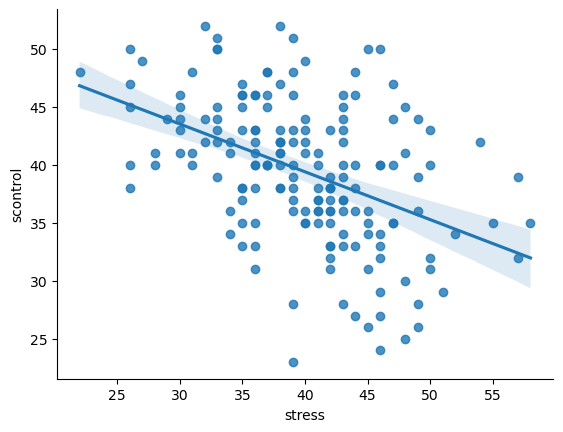

In [4]:
# 使用 `regplot`方法可视化数据。data表示传入的数据，x为自变量，y为因变量。
sns.regplot(x="stress", y="scontrol", data=df)
sns.despine()

## 定义先验  

从数据中可知，我们主要关注两个数据变量：自我控制水平$Y$，压力水平$X$  

$$  
Y_i | \beta_0, \beta_1, \sigma \stackrel{ind}{\sim} N\left(\mu_i, \sigma^2\right) \;\; \text{ with } \;\; \mu_i = \beta_0 + \beta_1X_i  
$$  

而根据之前的模型公式(数据模型)可发现，存在三个未知的参数$\beta_0，\beta_1，\sigma$  

* 在贝叶斯模型的框架下，我们需要为未知的参数指定先验：  
 
$$  
Y_i \sim N\left(\mu_i, \sigma^2\right) \;\; \text{ with } \;\; \mu_i = \beta_0 + \beta_1X_i  .\\  
$$  

$$  
\beta_0    \sim N\left(m_0, s_0^2 \right)  \\  
\beta_1   \sim N\left(m_1, s_1^2 \right) \\  
\sigma \sim \text{Exp}(l)  
$$  


> * 参数的前提假设(assumptions):  
>    * $\beta_0，\beta_1，\sigma$ 之间相互独立  
> * 此外，规定 $\sigma$ 服从指数分布，以限定其值恒为正数  
> * 其中，$m_0，s_0，m_1，s_1$为超参数  
>    * 我们需要根据我们对$\beta_0$和$\beta_1$的先验理解来选择超参数的范围  
>    * 比如，$\beta_1$反映了压力分数每增加1分，自我控制分数上升的值；$\beta_0$反映了压力分数为0时，自我控制分数的值  


**指定超参数**  

$$  
\begin{equation}  
\begin{array}{lcrl}  
\text{data:} & \hspace{.05in} &   Y_i | \beta_0, \beta_1, \sigma & \stackrel{ind}{\sim} N\left(\mu_i, \sigma^2\right) \;\; \text{ with } \;\; \mu_i = \beta_0 + \beta_1X_i \\  

\text{priors:} & & \beta_{0}  & \sim N\left(70, 4^2 \right)  \\  
                    & & \beta_1  & \sim N\left(0, 0.8^2 \right) \\  
                    & & \sigma   & \sim \text{Exp}(0.6)  .\\  
\end{array}  
\end{equation}  
$$  

这里，我们根据生活经验或直觉对超参数进行了定义：  
- 我们假设 $\beta_1$ 服从正态分布，其均值为0，标准差为0.8。 代表了：  

  * (斜率)将其均值指定为0，表明我们并未指定压力对自我控制的影响方向，压力既可能促进也可能抑制自我控制。  

    * 这个影响的量是变化的，范围大概在0 ± 0.8  

* 其次，我们假设 $\beta_0$ 服从正态分布，其均值为70，标准差为4。 代表了：  

  * （截距）当压力水平为0时，自我控制水平大概为70；    

  * 然而，这个值是变化的，$\beta_0$ 大概范围为 70 ± 4。  
   
* 最后，我们假设 $\sigma$ 服从指数分布，其参数为0.6。 从下图可见，其范围在0到6。  

  * 它代表了预测值在$\mu_i$附近波动的范围  


* 可视化指定超参下的先验：  


![Image Name](https://cdn.kesci.com/upload/s3pbojw6fn.png?imageView2/0/w/960/h/960)  




### 先验预测检验(prior predictive check)  

🤔有些同学可能认为这个先验的定义过于随意，甚至有些不靠谱。 那我们是否可以检验先验的合理性，以及适当的调整这个先验呐？  

**我们通过代码来说明，如何进行先验预测检验**  

首先根据公式，先验模型为：  

$$  
\begin{align*}  
\text{priors:} & & \beta_{0}  & \sim N\left(70, 4^2 \right)  \\  
                    & & \beta_1  & \sim N\left(0, 0.8^2 \right) \\  
                    & & \sigma   & \sim \text{Exp}(0.6)  .\\  
\end{align*}  
$$

**先验预测检验的大致思路**  

1. 在先验中随机抽取200组$\beta_0, \beta_1$值  

2. 生成假数据自变量X  

3. 生成200条 $\beta_0 + \beta_1 X$, 观察其中的预测值是否处在合理的范围内  

> 我们一步一步来看

1. 在先验中随机抽取200组$\beta_0, \beta_1$值  

In [84]:
# 设置随机种子确保结果可以重复
np.random.seed(84735)

# 根据设定的先验分布，在其中各抽取200个beta_0,200个beta_1, 200个sigma
beta0_200 = np.random.normal(loc = 70, scale =4 , size = 200)
beta1_200 = np.random.normal(loc = 0, scale =0.8 , size = 200)
sigma_200 = np.random.exponential(scale=1/0.6, size=200)

#将结果存在一个数据框内
prior_pred_sample = pd.DataFrame({"beta0":beta0_200,
                                  "beta1":beta1_200,
                                  "sigma":sigma_200})
#查看抽样结果                                
prior_pred_sample

,beta0,beta1,sigma
0,72.075109,-0.910879,2.284709
1,68.728191,-0.803882,0.385791
2,73.663583,-0.951329,2.781754
3,73.150642,0.318252,2.587576
4,68.638993,-1.449139,2.132834
...,...,...,...
195,64.747908,0.110601,3.944814
196,69.821940,0.794712,5.615775
197,70.779998,1.594084,2.279739
198,71.729835,-1.099491,0.073780


2. 生成假数据自变量X  
   
- 这里我们根据现实情况来定义X的取值范围  

    - 根据量表的结构，压力分数的范围为14-70  

- 我们使用 `np.arange`设置压力分数  


In [85]:
# 通过np.arange设置压力分数，从 14,15...70。
x_sim = np.arange(start=14,stop=71,step=1)

x_sim

array([14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30,
       31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47,
       48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64,
       65, 66, 67, 68, 69, 70])

3. 根据公式 $\mu = \beta_0 + \beta_1 X$ 生成200条回归线, 观察其中的$\mu$是否处在合理的范围内  

- 我们有200次采样，每次采样都有三个参数 beta_0, beta_1, sigma。  

- 结合每次采样的结果，和自变量X，我们可以生成一条直线  

- 重复这个过程200次，我们就能生成200条直线  

> **我们通过代码来理解一次采样的过程**  


![Image Name](https://cdn.kesci.com/upload/s3pfncehtc.png?imageView2/0/w/960/h/960)  




🎯练习：  

根据获取的第一条MCMC链的第一组采样参数，结合自变量X的范围，预测 $\mu$ 的值。  

1. 根据回归公式 $\mu = \beta_0 + \beta_1 X$ 预测$\mu$ 的值。  
2. 绘制回归线条。

In [86]:
# 获取第一组采样参数
beta_0 = prior_pred_sample["beta0"][0]
beta_1 = prior_pred_sample["beta1"][0]

print(f"获取的第一组采样参数值，beta_0:{beta_0:.2f}, beta_1:{beta_1:.2f}")

获取的第一组采样参数值，beta_0:72.08, beta_1:-0.91


In [87]:
#===========================
#     根据回归公式 $\mu = \beta_0 + \beta_1 X$ 预测$\mu$ 的值。
#     已知：X （x_sim） 的范围为14-71
#===========================
x_sim = np.arange(start=14,stop=71,step=1)
mu = ...
print("预测值",mu)

预测值 [59.32280265 58.41192363 57.5010446  56.59016557 55.67928655 54.76840752
 53.8575285  52.94664947 52.03577044 51.12489142 50.21401239 49.30313336
 48.39225434 47.48137531 46.57049629 45.65961726 44.74873823 43.83785921
 42.92698018 42.01610116 41.10522213 40.1943431  39.28346408 38.37258505
 37.46170602 36.550827   35.63994797 34.72906895 33.81818992 32.90731089
 31.99643187 31.08555284 30.17467381 29.26379479 28.35291576 27.44203674
 26.53115771 25.62027868 24.70939966 23.79852063 22.8876416  21.97676258
 21.06588355 20.15500453 19.2441255  18.33324647 17.42236745 16.51148842
 15.60060939 14.68973037 13.77885134 12.86797232 11.95709329 11.04621426
 10.13533524  9.22445621  8.31357718]


In [88]:
#===========================
#     绘制回归线，请设置x轴和y轴的变量
#===========================
x_axis = ...
y_axis = ...
plt.plot(x_axis,y_axis)
plt.xlabel("Stress")
plt.ylabel("Self Control")
sns.despine()

> 重复上述结果200遍，我们就能得到200次先验预测回归线了  

**可视化先验预测结果**  

- 每一条线代表一次抽样生成的预测，因此我们绘制了200条线。  

- 我们可以观测到自我控制水平(纵坐标)的范围随着压力(横坐标)的变化。  

- 自我控制水平的范围大概为(-50~200)  

> * 因为我们提供了一个**弱信息**的先验，所以自我控制水平出现了负数和过高的值。  
> * 但当我们提供数据时，这个范围会更接近真实，因此我们不必过于担心自我控制分数真的为负数😜。  
> * 相反，如果我们设置一个强信息先验，那么先验预测的结果可能更符合现实，但当数据加入模型时，模型可能并不能反映真实的数据。

In [89]:
# 通过np.arange设置压力分数，从 14,15...70。
x_sim = np.arange(start=14,stop=71,step=1)

# 设置一个空列表，用来储存每一个的预测结果
mu_outcome = []

#重复单次先验预测200次
for i in range(len(prior_pred_sample)):
    mu = prior_pred_sample["beta0"][i] + prior_pred_sample["beta1"][i]*x_sim
    mu_outcome.append(mu)

In [90]:
# 画出每一次的先验预测结果
for i in range(len(mu_outcome)):
    plt.plot(x_sim, mu_outcome[i])

plt.title("prior predictive check")
plt.xlabel("Stress")
plt.ylabel("Self Control")
sns.despine()

<Figure size 640x480 with 1 Axes>

## 后验分布  

### 模型定义  

现在，我们可以结合数据与先验，为参数$(\beta_0, \beta_1, \sigma)$生成后验模型  

* 在lec7中我们已经知道，当后验分布过于复杂时，可以使用MCMC来近似后验分布  

    * 我们使用pymc来完成采样过程  


在这之前，我们回顾之前对先验与似然的定义：  

* > $Y_i {\sim} N\left(\mu_i, \sigma^2\right)$  

* > $\beta_{0}   \sim N\left(70, 4^2 \right)$  

* > $\beta_1   \sim N\left(0, 0.8^2 \right)$  

* > $\mu_i = \beta_0 + \beta_1X_i$  

* > $\sigma   \sim \text{Exp}(0.6)$  


In [123]:
with pm.Model() as linear_model:

    beta_0 = pm.Normal("beta_0", mu=70, sigma=4)          #定义beta_0          
    beta_1 = pm.Normal("beta_1", mu=0, sigma=0.8)         #定义beta_1
    sigma = pm.Exponential("sigma", 0.6)                  #定义sigma

    x = pm.MutableData("x",df.stress)                     #x是自变量压力水平

    mu = beta_0 + beta_1 * x                              #定义mu，讲自变量与先验结合

    likelihood = pm.Normal("y_est", mu=mu, sigma=sigma, observed=df.scontrol)   #定义似然：预测值y符合N(mu, sigma)分布
                                                                                #通过 observed 传入实际数据y 自我控制水平

### 后验模拟  

1. 接下来我们使用`pm.sample()`进行mcmc采样  

* 我们指定了4条马尔科夫链，保留的采样数为5000，对于每一个参数，在每条链上都有5000个采样结果  

    * $\left\lbrace \beta_0^{(1)}, \beta_0^{(2)}, \ldots, \beta_0^{(5000)} \right\rbrace$  

    * $\left\lbrace \beta_1^{(1)}, \beta_1^{(2)}, \ldots, \beta_1^{(5000)} \right\rbrace$  
    
    * $\left\lbrace \sigma_1^{(1)}, \sigma_1^{(2)}, \ldots, \sigma_1^{(5000)} \right\rbrace$  


In [124]:
#===========================
#     注意！！！以下代码可能需要运行1-2分钟左右
#===========================
with linear_model:
    trace = pm.sample(draws=5000,                   # 使用mcmc方法进行采样，draws为采样次数
                      tune=1000,                    # tune为调整采样策略的次数，可以决定这些结果是否要被保留
                      chains=4,                     # 链数
                      discard_tuned_samples= True,  # tune的结果将在采样结束后被丢弃
                      random_seed=84735)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta_0, beta_1, sigma]


Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 58 seconds.


2. 在采样结束之后，我们得到采样样本 trace  

- 后验样本储存在`trace.posterior`中，它的数据类型为 xarray。  

  - 包括了两个维度(索引)，第一个维度为链chain，第二个维度为采样draw  
  
  - 包含了3个变量，即3个参数beta_0, beta_1, sigma  

	- 我们可以使用 `trace.posterior['beta_0']`提取后验中的$\beta_0$参数  

	- 我们可以使用 `trace.posterior['beta_0'][0, 10]`提取$\beta_0$第一条链中第10个采样值

In [126]:
trace

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data
	> constant_data

In [125]:
trace.posterior

<xarray.Dataset>
Dimensions:  (chain: 4, draw: 5000)
Coordinates:
  * chain    (chain) int64 0 1 2 3
  * draw     (draw) int64 0 1 2 3 4 5 6 7 ... 4993 4994 4995 4996 4997 4998 4999
Data variables:
    beta_0   (chain, draw) float64 58.87 58.57 57.45 58.36 ... 64.75 63.68 61.97
    beta_1   (chain, draw) float64 -0.4782 -0.4796 -0.4733 ... -0.606 -0.5615
    sigma    (chain, draw) float64 5.695 5.506 5.278 5.206 ... 5.174 5.181 5.28
Attributes:
    created_at:                 2023-11-06T16:12:36.984837
    arviz_version:              0.16.0
    inference_library:          pymc
    inference_library_version:  5.6.0
    sampling_time:              58.18145966529846
    tuning_steps:               1000

In [95]:
trace.posterior['beta_0']

<xarray.DataArray 'beta_0' (chain: 4, draw: 5000)>
array([[58.86695078, 58.57345176, 57.44999204, ..., 56.87899891,
        55.18460974, 56.52524464],
       [60.33121294, 60.48527833, 60.17064049, ..., 60.95351092,
        59.88658912, 59.21138754],
       [62.85570065, 58.3407012 , 58.76709596, ..., 58.91063931,
        59.11366693, 56.22569953],
       [60.60435197, 60.45496042, 59.04095076, ..., 64.74854344,
        63.67703222, 61.97186055]])
Coordinates:
  * chain    (chain) int64 0 1 2 3
  * draw     (draw) int64 0 1 2 3 4 5 6 7 ... 4993 4994 4995 4996 4997 4998 4999

In [96]:
trace.posterior['beta_0'][0, 10]

<xarray.DataArray 'beta_0' ()>
array(58.39827502)
Coordinates:
    chain    int64 0
    draw     int64 10

使用`az.plot_trace()`可视化参数的后验分布

In [97]:
az.plot_trace(trace, figsize=(15,10),compact=False,legend=True)

array([[<Axes: title={'center': 'beta_0'}>,
        <Axes: title={'center': 'beta_0'}>],
       [<Axes: title={'center': 'beta_1'}>,
        <Axes: title={'center': 'beta_1'}>],
       [<Axes: title={'center': 'sigma'}>,
        <Axes: title={'center': 'sigma'}>]], dtype=object)

<Figure size 1500x1000 with 6 Axes>

## 解释后验  

我们共得到20000对$\beta_0$和$\beta_1$值，可以通过`az.summary()`总结参数的基本信息  

- 这其中包括了对于模型的诊断信息 ess_bulk 和 r_hat (当然你可以结合可视化进行诊断)。  
	- 其中，各参数的 r_hat 均接近于 1；  
	- 各参数的ess_bulk 均大于 400，并且有效样本量占比 (6000/20000)=0.3，大于0.1(即10%)。  
 
- 同时该结果也包含了参数的均值和HDI。

In [98]:
az.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
beta_0,59.898,2.175,55.967,64.087,0.029,0.020,5770.0,7559.0,1.0
beta_1,-0.510,0.054,-0.612,-0.410,0.001,0.001,5788.0,7482.0,1.0
sigma,5.498,0.302,4.951,6.081,0.003,0.002,9409.0,8764.0,1.0


* 我们可以使用均值来理解生成的后验分布，通过上表我们知道  

	*  $\beta_0$= 59.90 *(压力水平为0时的自我控制水平，意义不大在此不考虑)*  

	*  $\beta_1$ = -0.51  

	*  我们可以将其解释为，压力水平每增加1分，自我控制水平下降0.51分  

* 但从上表我们也知道参数的后验分布存在不确定性，参数均值生成的回归线只是其中之一  

	* 那么我们可以通过20000对参数值，生成20000条回归线

## 后验预测  

### 对变量关系的预测  

1. 使用单条回归线来表示`压力`与`自我控制水平`的关系存在不确定性，那么可以结合后验采样的所有结果，观察二者关系

### 练习  

根据 **先验预测检验可视化预测结果**的思路，对于后验预测结果进行可视化。  

1. 使用真实数据中的自变量df.stress  
2. 根据 20000对参数，与自变量进行组合，生成了20000条回归线  
3. 绘制后验预测结果  

*(代码需运行3分钟左右)*

In [33]:
# 导入真实数据中的自变量
x_value = xr.DataArray(...)

##---------------------------------------------------------------------------
#      20000对参数与自变量进行组合，生成了20000条回归线
#      提示：基本公式为 y_model = beta_0 + beta_1 * x
#      提示：但需要对参数的表达进行修改
#           如：beta_0 = trace.posterior["beta_0"]
#---------------------------------------------------------------------------
y_model = ...


## 为了画图时反应所有链合并的结果，将y_sim的chain和draw融合到一起
y_sim_re = y_model.stack(sample=("chain", "draw"))

# 绘制回归线条
plt.plot(x_value, y_sim_re, c="gray", alpha=0.01)

# 绘制真实数据的散点图
plt.scatter(trace.constant_data.x,trace.observed_data.y_est,c="r", label="observed data")

# 设置标题等
plt.title("posterior predictive check")
plt.xlabel("Stress")
plt.ylabel("Self control")
plt.legend()
sns.despine()

**使用`plot_lm` 绘制后验预测的线性模型**  

**代码详解**  

- 与上一段代码最大的不同之处在于，此时需要将`y_model` 存入`trace`中  

- 在`az.plot_lm`中:  
    - `y` 为真实数据中的因变量`df.scontrol`  
    - `x` 为真实数据中的自变量`df.stress`  
    - `y_model` 为结合后验采样生成的预测值  
    （在图中表示为黄色和灰色的回归线）  

> 😎*跑起来快很多*

In [99]:
# 导入真实的自变量
x_value = xr.DataArray(df.stress)

# 20000对参数与自变量进行组合，生成了20000条回归线
trace.posterior["y_model"] = trace.posterior["beta_0"] + trace.posterior["beta_1"] * x_value

#绘制实际数据分布，与回归线结果
az.plot_lm(
           y= df.scontrol,
           x= df.stress,
           y_model = trace.posterior["y_model"],
           figsize=(15,10),
           textsize=15,
           grid=False)

# 设置坐标轴标题、字体大小
plt.xlabel('Stress', fontsize=16)  
plt.ylabel('Self control', fontsize=16)  
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)  
sns.despine()

<Figure size 1500x1000 with 1 Axes>

### 对特定结果的预测  

> 回归模型的参数除了可以帮助我们理解自变量与因变量的关系，还可以帮助我们对特定结果做出出现预测  

❓预测问题如：在数据集中，若压力水平为35，则对应的自我控制分数可能是多少  

* 若我们以参数的后验均值($\beta_0 = 64.33$, $\beta_1=-0.59$ )进行预测  

$$  
64.33+ 35 * -0.59 =  43.68  
$$  

* 但在lec8中我们知道后验预测中存在 采样变异和参数变异  

    * 在这个例子中，采样变异指的是压力水平为35的被试并不总是有着同样的自我控制水平  
    
    * 而参数变异指的是，后验分布并没有指定唯一的参数  

* 在lec8中，我们知道，可以通过遍历所有参数组合下，所有事件发生可能性的求和平均来生成后验预测分布  
$$  
f\left(y_{\text{new}} | \vec{y}\right) = \int\int\int f\left(y_{new} | \beta_0,\beta_1,\sigma\right) f(\beta_0,\beta_1,\sigma|\vec{y}) d\beta_0 d\beta_1 d\sigma .  
$$  

😥但这也太抽象了...  


### 通过MCMC采样值理解后验预测分布  


* 通过MCMC采样，三个参数各获得了20000个采样值$\left(\beta_0^{(i)},\beta_1^{(i)},\sigma^{(i)}\right)$  

* 当X = 35时，每一组参数值都可以指定一个预测值$Y$可能符合的正态分布，我们可以从该正态分布中抽取一个预测值$Y_{new}$  

>    以i = 1 和 i = 2 的情况为例  

$$  
Y_{\text{new}}^{(i)} | \; \sim \; N\left(\mu^{(i)}, \left(\sigma^{(i)}\right)^2\right) \;\; \text{ with } \;\; \mu^{(i)} = \beta_0^{(i)} + \beta_1^{(i)} \cdot 35.  
$$  


![Image Name](https://cdn.kesci.com/upload/s3phhikeux.png?imageView2/0/w/960/h/960)  



**使用代码模拟单次后验预测**  

* 我们有20000组参数值，就能得到20000个预测值$Y$可能符合的正态分布，并抽取出20000个预测值$Y_{new}$  

* 这20000个预测值$Y_{new}$就构成了X = 35时，$Y$的后验预测分布  

$$  
\left[  
\begin{array}{lll}  
\beta_0^{(1)} & \beta_1^{(1)} & \sigma^{(1)} \\  
\beta_0^{(2)} & \beta_1^{(2)} & \sigma^{(2)} \\  
\vdots & \vdots & \vdots \\  
\beta_0^{(20000)} & \beta_1^{(20000)} & \sigma^{(20000)} \\  
\end{array}  
\right]  
\;\; \longrightarrow \;\;  
\left[  
\begin{array}{l}  
Y_{\text{new}}^{(1)} \\  
Y_{\text{new}}^{(2)} \\  
\vdots \\  
Y_{\text{new}}^{(20000)} \\  
\end{array}  
\right]  
$$  

* 我们先用代码来模拟单次完整的抽取过程

In [100]:
# 采样得到的参数后验分布都储存在 trace.posterior中，我们进行一些提取操作
pos_sample = trace.posterior.stack(sample=("chain", "draw"))

# 将每个参数的20000次采样结果存储在数据框中
df_pos_sample = pd.DataFrame({"beta_0": pos_sample["beta_0"].values,
                              "beta_1": pos_sample["beta_1"].values,
                              "sigma": pos_sample["sigma"].values})

# 查看参数
df_pos_sample

,beta_0,beta_1,sigma
0,58.866951,-0.478153,5.694923
1,58.573452,-0.479603,5.505718
2,57.449992,-0.473291,5.278344
3,58.356041,-0.453055,5.206056
4,58.281699,-0.458185,5.218929
...,...,...,...
19995,58.333682,-0.458488,5.088218
19996,62.974010,-0.596638,5.915683
19997,64.748543,-0.637929,5.174244
19998,63.677032,-0.606011,5.181334


In [101]:
# 抽取第一组参数组合，生成正态分布的均值
row_i = 0  # 抽取第一行
X_i = 35   # 假设压力分数为 35
mu_i = df_pos_sample.beta_0[row_i] + df_pos_sample.beta_1[row_i] * X_i           
sigma_i = df_pos_sample.sigma[row_i]

# 从正态分布中随机抽取一个值，作为预测值
prediction_i = np.random.normal(
                                loc = mu_i,                                            
                                scale= sigma_i, 
                                size=1)

# 你可以运行该代码块多次，比较在相同参数下，预测值的变化(感受采样变异)。
print(f"mu_i: {mu_i:.2f}, 预测值：{prediction_i[0]:.2f}")

mu_i: 42.13, 预测值：32.71


**使用代码模拟多次后验预测**  

* 通过上述四行代码，我们已经进行了一次完整的后验预测  

* 我们可以写一个循环，重复这个过程20000次  

* 最后的结果中，每一行代表一个参数对；mu 为预测的均值，y_new 为实际生成的预测值。

In [103]:
# 生成两个空列，用来储存每一次生成的均值mu，和每一次抽取的预测值y_new
df_pos_sample['mu'] = np.nan
df_pos_sample['y_new'] = np.nan
np.random.seed(84735)
# 将之前的操作重复20000次
for row_i in range(len(df_pos_sample)):
    mu_i = df_pos_sample.beta_0[row_i] + df_pos_sample.beta_1[row_i] * 35
    df_pos_sample["mu"][row_i] = mu_i
    df_pos_sample["y_new"][row_i] = np.random.normal(loc = mu_i,
                                            scale= df_pos_sample.sigma[row_i],
                                            size=1)

In [104]:
df_pos_sample

,beta_0,beta_1,sigma,mu,y_new
0,58.866951,-0.478153,5.694923,42.131607,45.086003
1,58.573452,-0.479603,5.505718,41.787347,40.036792
2,57.449992,-0.473291,5.278344,40.884811,45.719223
3,58.356041,-0.453055,5.206056,42.499108,46.599712
4,58.281699,-0.458185,5.218929,42.245208,40.469458
...,...,...,...,...,...
19995,58.333682,-0.458488,5.088218,42.286588,47.062461
19996,62.974010,-0.596638,5.915683,42.091697,48.615803
19997,64.748543,-0.637929,5.174244,42.421028,40.989204
19998,63.677032,-0.606011,5.181334,42.466645,42.623520


**绘制后验预测分布**  

根据刚刚生成的数据，我们可以分别绘制出 $\mu$ 与 $Y_{new}$ 的后验预测分布图

In [109]:
#查看真实数据中的取值，与后验预测分布作对比
print("x=35时y的取值有:", np.array(df[df["stress"]==35]))

x=35时y的取值有: [[35 46]
 [35 46]
 [35 37]
 [35 45]
 [35 33]
 [35 43]
 [35 38]
 [35 35]
 [35 38]
 [35 47]]


In [110]:
#新建画布
fig, axs = plt.subplots(1, 2, figsize=(15, 5), sharey=True, sharex=True)        

#在第一个画布中绘制出生成的mu的分布
sns.kdeplot(data=df_pos_sample,                                                
            x="mu", 
            color="black",
            ax=axs[0])

#在第二个画布中绘制出生成的y_new的分布
sns.kdeplot(data=df_pos_sample,                                                 
            x="y_new", 
            color="black",
            ax=axs[1])

fig.suptitle('Posterior predictive distribution(X=35)', fontsize=16)
sns.despine()

<Figure size 1500x500 with 2 Axes>

从上图可以看到， $Y_{new}$ 分布的不确定性远大于 $\mu$ 分布的不确定性  

同样可以画出二者95%的可信区间  



![Image Name](https://cdn.kesci.com/upload/s3pi09kuxm.png?imageView2/0/w/960/h/960)  


### 总体后验预测分布  

* 除了生成特定自变量下，因变量的分布，也可以生成总体因变量的后验预测分布  

* 通过 `pymc.sample_posterior_predictive`方法可以快速从模型生成后验预测数据。

In [40]:
with linear_model:
    pm.sample_posterior_predictive(trace, extend_inferencedata=True)

Sampling: [y_est]


接着，我们可以使用 arviz 提供的后验预测检查函数 `plot_ppc`来绘制结果。  

- 黑色线条代表观测值(自我控制分数)总体的分布情况。  

- 蓝色线代表每一对采样参数对应的后验预测的分布情况。  

- 橙色为后验预测的均值的分布情况

In [41]:
az.plot_ppc(trace, num_pp_samples=1000) # num_pp_samples 参数代表从总的采样(20000)选取多少采样(这里是1000)进行后验预测计算

<Axes: xlabel='y_est / y_est'>

<Figure size 640x480 with 1 Axes>

### 对新数据的预测  

- 采样得到的后验参数基于"Tsinghua"的数据，到目前为止，我们都在使用后验参数对这一批数据做出后验预测  

- Human Penguin Project 是一个跨国研究，那么基于"Tsinghua"数据得出的后验参数估计对其他数据的预测效果如何？  

- 我们可以选用一批新的数据，查看当前参数是否能预测新数据中的变量关系

In [111]:
# 筛选站点为"Oxford"的数据
df_new = df_raw[df_raw["Site"] == "Oxford"]

# 选择需要的两列
df_new = df_new[["stress","scontrol"]]

#设置索引
df_new["index"] = range(len(df_new))
df_new = df_new.set_index("index")

# 显示部分数据
df_new.head()

,stress,scontrol
index,,
0,19,46
1,31,40
2,33,40
3,41,33
4,39,33


In [112]:
# 除替换自变量数据外，代码思路与 *对变量关系的预测* 部分完全一致。
# 导入新的自变量
x_new = xr.DataArray(df_new.stress)

# 20000对参数与自变量进行组合，生成了20000条回归线
y_model_new = trace.posterior["beta_0"] + trace.posterior["beta_1"] * x_new

#绘制实际数据分布，与回归线结果
az.plot_lm(
           y= df_new.scontrol,
           x= df_new.stress,
           y_model = y_model_new,
           figsize=(15,10),
           textsize=15,
           grid=False)

# 设置坐标轴标题、字体大小
plt.title("posterior predictive check for a new dataset", fontsize=20)
plt.xlabel('Stress', fontsize=16)  
plt.ylabel('Self control', fontsize=16)  
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)  
sns.despine()

<Figure size 1500x1000 with 1 Axes>

In [132]:
with linear_model:
    pm.set_data({"new_data": df_new.stress})
    trace = pm.sample_posterior_predictive(
        trace,
        return_inferencedata=True,
        predictions=True,
        extend_inferencedata=True)

In [135]:
trace

Inference data with groups:
	> posterior
	> posterior_predictive
	> predictions
	> sample_stats
	> observed_data
	> constant_data
	> predictions_constant_data

In [134]:
with linear_model:
    pm.sample_posterior_predictive(trace, extend_inferencedata=True)

Sampling: [y_est]


## 使用bambi进行模型定义  

Bambi 是一个用于贝叶斯统计建模的 Python 包，建立在 PyMC 上。  

```pyhon  
model = bmb.Model('scontrol ~ stress',  
                  data=df,  
                  dropna=True)  
```

* 它提供了一个更加简化的界面，使得使用贝叶斯统计模型更加容易，特别是在处理线性和广义线性混合模型时。  

* 上面的代码提供了一个示例，我们可以简单的三行代码来完成之前的回归模型的定义。  

* 其中，我们可以通过 lme4 的形式来表达线性关系：`'scontrol ~ stress'`。~左边是因变量，右边是自变量。例如还有其他变量(如addiction)可以扩展写为`''scontrol ~ stress' + addiction'`。  
 
* 需要注意的是，在bambi中，如果我们不对先验进行定义，它会自动选择一个比较弱(weakly informative)的先验。

我们通过代码示例来说明如何通过 bambi 复现之前的分析：  

1. 首先定义模型

In [113]:
import bambi as bmb

#定义先验并传入模型中
intercept_prior = bmb.Prior("Normal", mu=70, sigma=4)     #对应beta_0
stress_prior = bmb.Prior("Normal", mu=0, sigma=0.8)          #对应beta_1
sigma_prior = bmb.Prior("Exponential", lam = 0.6)            #对应sigma

# 将三个参数的先验定义在字典prior中
priors = {"Intercept": intercept_prior, 
          "stress": stress_prior,
          "sigma": sigma_prior}

#定义关系式，传入数据
model = bmb.Model('scontrol ~ stress', 
                  data=df,
                  priors=priors,
                  dropna=True)
#总结对模型的设置
model

       Formula: scontrol ~ stress
        Family: gaussian
          Link: mu = identity
  Observations: 174
        Priors: 
    target = mu
        Common-level effects
            Intercept ~ Normal(mu: 70.0, sigma: 4.0)
            stress ~ Normal(mu: 0.0, sigma: 0.8)
        
        Auxiliary parameters
            sigma ~ Exponential(lam: 0.6)

2. 拟合模型，使用MCMC方法采样得到后验的近似分布  

- 提示：`model.fit` 基于 `pm.sample` 方法。因此，他们的参数设置是相同可继承的。

In [114]:
#===========================
#      MCMC采样过程
#      注意！！！以下代码可能需要运行几分钟
#===========================
trace = model.fit(draws=5000,                   # 使用mcmc方法进行采样，draws为采样次数
                  tune=1000,                    # tune为调整采样策略的次数，可以决定这些结果是否要被保留
                  chains=4,
                  random_seed=84735)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [scontrol_sigma, Intercept, stress]


Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 23 seconds.


模型诊断部分的分析和之前直接使用 pymc 是一致的。

In [115]:
az.plot_trace(trace, figsize=(15,10), compact=False)

array([[<Axes: title={'center': 'Intercept'}>,
        <Axes: title={'center': 'Intercept'}>],
       [<Axes: title={'center': 'stress'}>,
        <Axes: title={'center': 'stress'}>],
       [<Axes: title={'center': 'scontrol_sigma'}>,
        <Axes: title={'center': 'scontrol_sigma'}>]], dtype=object)

<Figure size 1500x1000 with 6 Axes>

In [116]:
az.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,56.180,2.540,51.335,60.842,0.015,0.010,29867.0,15095.0,1.0
stress,-0.411,0.063,-0.527,-0.293,0.000,0.000,30304.0,14619.0,1.0
scontrol_sigma,5.476,0.293,4.927,6.015,0.002,0.001,30551.0,15758.0,1.0


## 补充材料：为什么使用MCMC是必要的  

>我们都知道当后验分布的计算过于复杂时，我们应该选用MCMC来近似后验分布  

>但是在这里后验分布究竟有多复杂呢，这里提供了直接的计算(or提供一些复杂的公式让人知难而退)：  

1. 该线性模型存在三个参数值$(\beta_0, \beta_1, \sigma)$  
	* 那么先验概率则为三者pdf的乘积：  
$$  
 f(\beta_0, \beta_1, \sigma) = f(\beta_0) f(\beta_1) f(\sigma)  
$$  

2. 观测到的数据可以用$\vec{y} = (y_1,y_2,...,y_{n})$来表示  
	* 那么似然函数可以表示为：  
$$  
 L(\beta_0, \beta_1, \sigma | \vec{y}) = f(\vec{y}|\beta_0, \beta_1, \sigma) = \prod_{i=1}^{n}f(y_i|\beta_0, \beta_1, \sigma)  
 $$  

3. 后验分布则可以表示为：  
$$  
\begin{split}  
f(\beta_0,\beta_1,\sigma \; | \; \vec{y})  
 & = \frac{\text{prior} \cdot \text{likelihood}}{ \int \text{prior} \cdot \text{likelihood}} \\  
 & = \frac{f(\beta_0) f(\beta_1) f(\sigma) \cdot \left[\prod_{i=1}^{n}f(y_i|\beta_0, \beta_1, \sigma) \right]}  
 {\int\int\int f(\beta_0) f(\beta_1) f(\sigma) \cdot \left[\prod_{i=1}^{n}f(y_i|\beta_0, \beta_1, \sigma) \right] d\beta_0 d\beta_1 d\sigma} \\  
 \end{split}  
 $$  


## 总结  

* 本节课通过一个简单的例子展示了如何使用 pymc 来建立线性回归模型，并结合之前课程的内容对模型结果进行了分析。  
  * 特别是如何进行先验和后验预测的检验。  
* 此外，我们介绍了如何使用 bambi 来简化线性模型的定义和拟合。  
* 最后，我们强调了 MCMC 方法近似后验分布的重要性。